In [106]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as data

In [107]:
start = '2004-01-01'
end = '2023-12-31'

df = data.download('AAPL', start=start, end=end)
print(df.head())

[*********************100%%**********************]  1 of 1 completed

                Open      High       Low     Close  Adj Close     Volume
Date                                                                    
2004-01-02  0.384821  0.388393  0.378214  0.380000   0.321708  144642400
2004-01-05  0.382500  0.399821  0.382500  0.395893   0.335163  395018400
2004-01-06  0.397321  0.400357  0.387679  0.394464   0.333953  509348000
2004-01-07  0.394643  0.407679  0.391607  0.403393   0.341512  586874400
2004-01-08  0.407857  0.423750  0.404464  0.417143   0.353153  460303200


In [108]:
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-12-22,195.179993,195.410004,192.970001,193.600006,193.353287,37122800
2023-12-26,193.610001,193.889999,192.830002,193.050003,192.803986,28919300
2023-12-27,192.490005,193.500000,191.089996,193.149994,192.903839,48087700
2023-12-28,194.139999,194.660004,193.169998,193.580002,193.333298,34049900
2023-12-29,193.899994,194.399994,191.729996,192.529999,192.284637,42628800


In [109]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2004-01-02,0.384821,0.388393,0.378214,0.380000,0.321708,144642400
2004-01-05,0.382500,0.399821,0.382500,0.395893,0.335163,395018400
2004-01-06,0.397321,0.400357,0.387679,0.394464,0.333953,509348000
2004-01-07,0.394643,0.407679,0.391607,0.403393,0.341512,586874400
2004-01-08,0.407857,0.423750,0.404464,0.417143,0.353153,460303200


In [110]:
df=df.reset_index()
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2004-01-02,0.384821,0.388393,0.378214,0.380000,0.321708,144642400
1,2004-01-05,0.382500,0.399821,0.382500,0.395893,0.335163,395018400
2,2004-01-06,0.397321,0.400357,0.387679,0.394464,0.333953,509348000
3,2004-01-07,0.394643,0.407679,0.391607,0.403393,0.341512,586874400
4,2004-01-08,0.407857,0.423750,0.404464,0.417143,0.353153,460303200


In [111]:
df=df.drop(['Date','Adj Close'], axis= 1)
df.head()

,Open,High,Low,Close,Volume
0,0.384821,0.388393,0.378214,0.380000,144642400
1,0.382500,0.399821,0.382500,0.395893,395018400
2,0.397321,0.400357,0.387679,0.394464,509348000
3,0.394643,0.407679,0.391607,0.403393,586874400
4,0.407857,0.423750,0.404464,0.417143,460303200


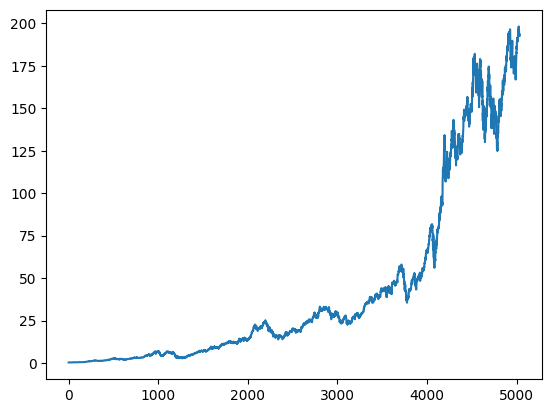

In [112]:
plt.plot(df.Close)


In [113]:
ma100= df.Close.rolling(100).mean()
ma100

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
5028    181.768301
5029    181.787101
5030    181.898701
5031    182.046001
5032    182.173301
Name: Close, Length: 5033, dtype: float64

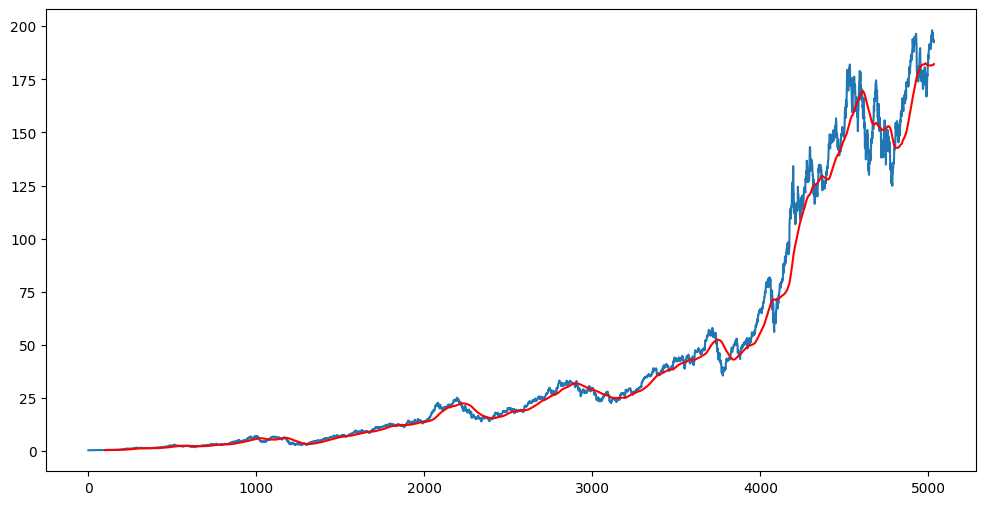

In [114]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')

In [115]:
ma200= df.Close.rolling(200).mean()
ma200

0              NaN
1              NaN
2              NaN
3              NaN
4              NaN
           ...    
5028    178.649100
5029    178.871851
5030    179.085250
5031    179.290201
5032    179.487900
Name: Close, Length: 5033, dtype: float64

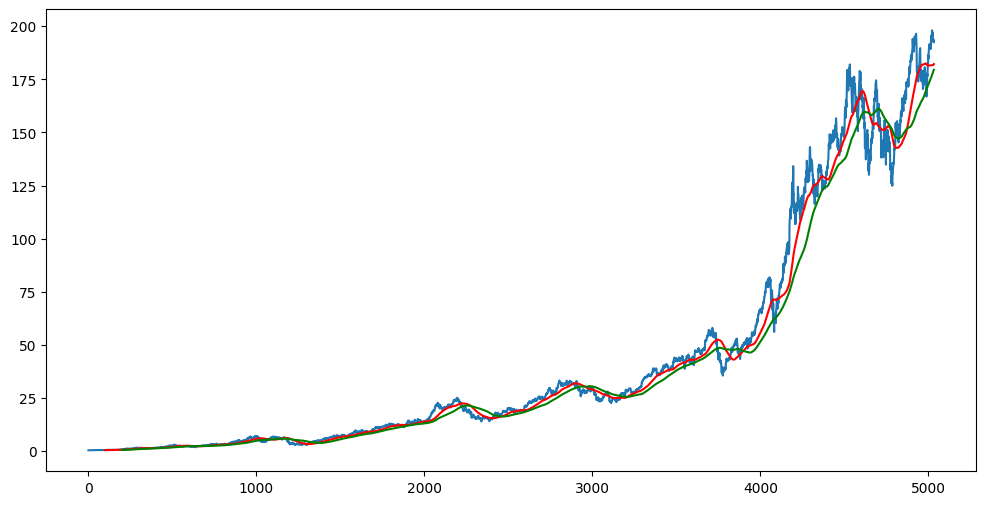

In [116]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

In [117]:
df.shape

(5033, 5)

In [118]:
data_training=pd.DataFrame(df['Close'][0:int(len(df)*0.70)])
data_testing= pd.DataFrame(df['Close'][int(len(df)*0.70):int(len(df))])

print(data_training.shape)
print(data_testing.shape)

(3523, 1)
(1510, 1)


In [119]:
data_training.head()

,Close
0,0.380000
1,0.395893
2,0.394464
3,0.403393
4,0.417143


In [120]:
data_testing.head()

,Close
3523,42.307499
3524,43.064999
3525,43.057499
3526,43.257500
3527,43.750000


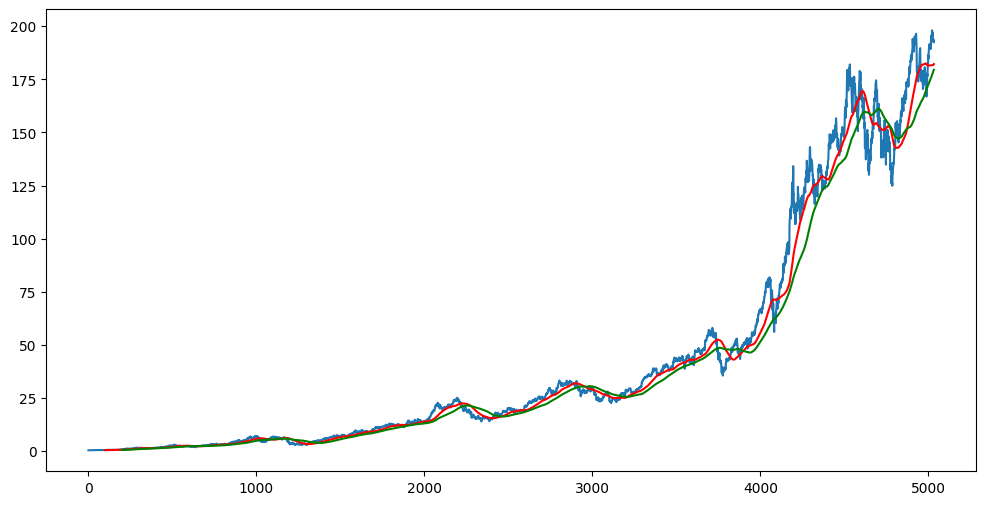

In [121]:
plt.figure(figsize=(12,6))
plt.plot(df.Close)
plt.plot(ma100,'r')
plt.plot(ma200,'g')

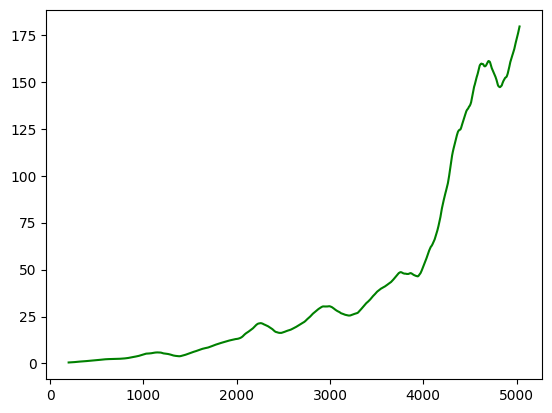

In [122]:
plt.plot(ma200,'g')



In [123]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [124]:
data_training_array = scaler.fit_transform(data_training)
data_training_array

array([[0.00000000e+00],
       [3.63476557e-04],
       [3.30794536e-04],
       ...,
       [9.66552368e-01],
       [9.66723887e-01],
       [9.69468288e-01]])

In [125]:
data_training_array.shape

(3523, 1)

In [126]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
  x_train.append(data_training_array[i-100:i])
  y_train.append(data_training_array[i,0])

x_train, y_train= np.array(x_train), np.array(y_train)

In [127]:
x_train.shape

(3423, 100, 1)

In [128]:
#ml model

In [129]:
from keras.layers import Dense, Dropout, LSTM
from keras.models import Sequential

In [130]:
model = Sequential()
model.add(LSTM(units=50, activation='relu', return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(Dropout(0.2))

model.add(LSTM(units=60, activation='relu', return_sequences=True))
model.add(Dropout(0.3))

model.add(LSTM(units=80, activation='relu', return_sequences=True))
model.add(Dropout(0.4))

model.add(LSTM(units=120, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(units=1))


In [131]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 100, 50)           10400     
                                                                 
 dropout_8 (Dropout)         (None, 100, 50)           0         
                                                                 
 lstm_10 (LSTM)              (None, 100, 60)           26640     
                                                                 
 dropout_9 (Dropout)         (None, 100, 60)           0         
                                                                 
 lstm_11 (LSTM)              (None, 100, 80)           45120     
                                                                 
 dropout_10 (Dropout)        (None, 100, 80)           0         
                                                                 
 lstm_12 (LSTM)              (None, 120)              

In [132]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(x_train, y_train, epochs=50)


Epoch 1/50
107/107 [==============================] - 35s 269ms/step - loss: 0.0212
Epoch 2/50
107/107 [==============================] - 30s 282ms/step - loss: 0.0048
Epoch 3/50
107/107 [==============================] - 28s 266ms/step - loss: 0.0047
Epoch 4/50
107/107 [==============================] - 28s 266ms/step - loss: 0.0044
Epoch 5/50
107/107 [==============================] - 28s 266ms/step - loss: 0.0036
Epoch 6/50
107/107 [==============================] - 28s 266ms/step - loss: 0.0038
Epoch 7/50
107/107 [==============================] - 29s 271ms/step - loss: 0.0033
Epoch 8/50
107/107 [==============================] - 29s 273ms/step - loss: 0.0031
Epoch 9/50
107/107 [==============================] - 29s 266ms/step - loss: 0.0032
Epoch 10/50
107/107 [==============================] - 29s 268ms/step - loss: 0.0030
Epoch 11/50
107/107 [==============================] - 28s 266ms/step - loss: 0.0030
Epoch 12/50
107/107 [==============================] - 29s 267ms/step - lo

In [133]:
model.save('project_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [134]:
past_100_days= data_training.tail(100)

In [135]:
data_testing

,Close
3523,42.307499
3524,43.064999
3525,43.057499
3526,43.257500
3527,43.750000
...,...
5028,193.600006
5029,193.050003
5030,193.149994
5031,193.580002


In [137]:
print(type(past_100_days))
print(type(data_testing))


<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [138]:
final_df = pd.concat([past_100_days, data_testing], ignore_index=True)


In [139]:
final_df

,Close
0,40.020000
1,40.264999
2,38.830002
3,39.369999
4,39.962502
...,...
1605,193.600006
1606,193.050003
1607,193.149994
1608,193.580002


In [140]:
input_data= scaler.fit_transform(final_df)

In [141]:
x_test=[]
y_test=[]
for i in range (100,input_data.shape[0]):
  x_test.append(input_data[i-100:i])
  y_test.append(input_data[i,0])


In [142]:
x_test,y_test=np.array(x_test), np.array(y_test)

In [144]:
x_test.shape
y_test.shape

(1510,)

In [145]:
y_predicted =model.predict(x_test)

48/48 [==============================] - 4s 76ms/step


In [146]:
y_predicted.shape

(1510, 1)

In [147]:
scaler.scale_

array([0.00615148])

In [148]:
scale_factor=1/0.00615148

In [149]:
y_predicted= y_predicted*scale_factor
y_test = y_test * scale_factor

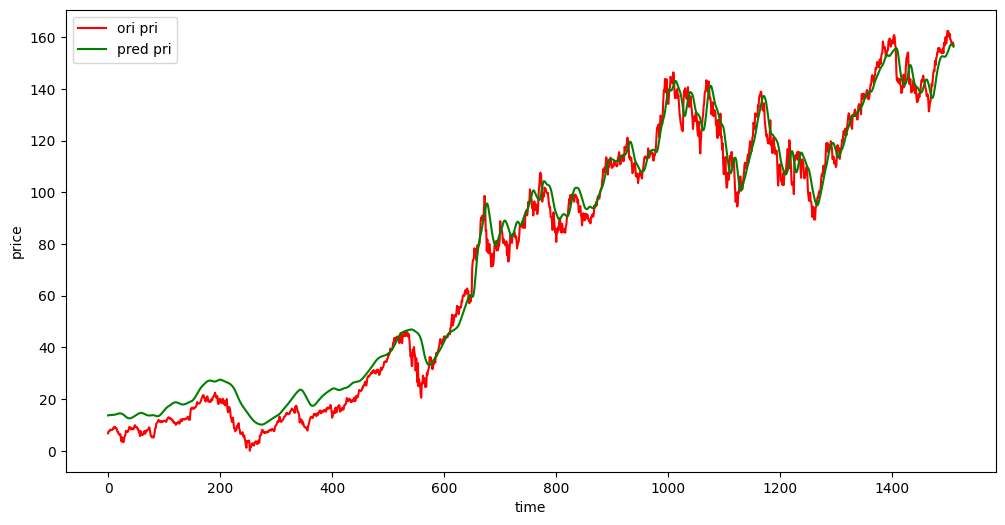

In [150]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'r',label='ori pri')
plt.plot(y_predicted,'g',label='pred pri')
plt.xlabel('time')
plt.ylabel('price')
plt.legend()


In [151]:
df.describe()

,Open,High,Low,Close,Volume
count,5033.000000,5033.000000,5033.000000,5033.000000,5.033000e+03
mean,42.893346,43.359537,42.445401,42.922508,4.072034e+08
std,53.111321,53.702485,52.565911,53.162858,3.968755e+08
min,0.382500,0.388393,0.378214,0.380000,2.404830e+07
25%,5.852143,5.950000,5.752857,5.853929,1.121723e+08
50%,21.446072,21.667856,21.228930,21.517857,2.740064e+08
75%,47.952499,48.520000,47.724998,48.070000,5.759992e+08
max,198.020004,199.619995,197.000000,198.110001,3.372970e+09
